# Aula 15 e 16 - SVR Linear

In [1]:
from sklearn import datasets
data = datasets.load_boston()

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])

In [3]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [5]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

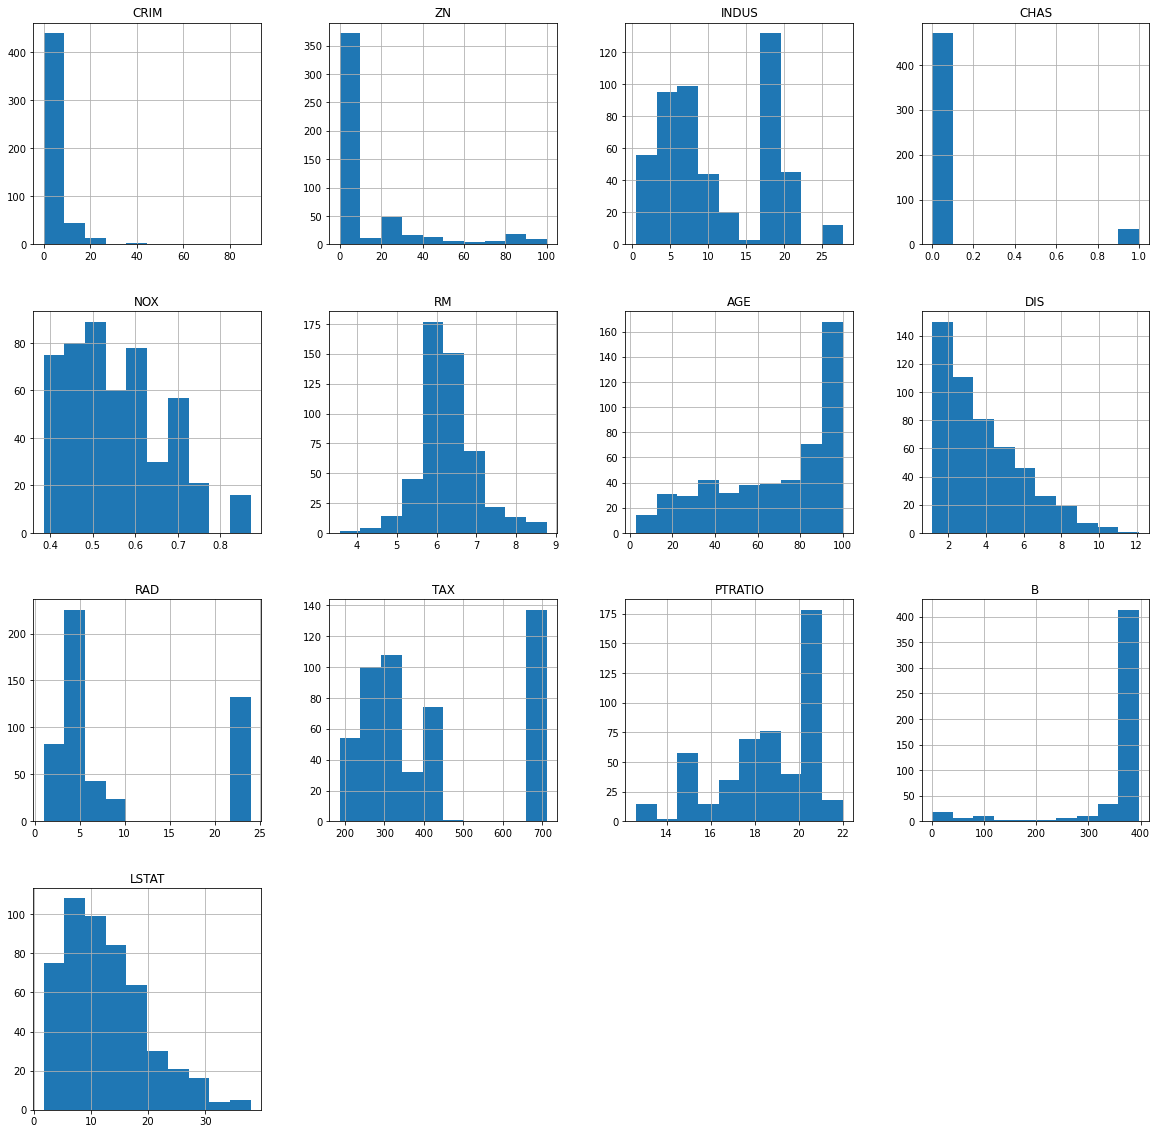

In [7]:
df.hist(figsize=(20,20))

In [8]:
X = df
y = target['MEDV']

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,40))

for i, col in enumerate(X.columns):
    plt.subplot(7, 2, i+1)
    x = X[col]
    y = y
    plt.plot(x, y, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Preços')

## Linear Regression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = X['RM']

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(x_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt


In [17]:
y_predict = lm.predict(x_test)

In [18]:
#Gráfico da regressão linear simples
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict)
plt.xlabel('RM - Número de quartos')
plt.ylabel('Preço do imóvel (em milhares de reais)')
plt.show()

In [19]:
mae = mean_absolute_error(y_test, y_predict)
print('MAE = ', mae)

MAE =  4.478335832064149


## SVR Linear

In [20]:
from sklearn.svm import LinearSVR

In [21]:
eps = 5
C = 0.01
svr = LinearSVR(epsilon = eps, C = C, fit_intercept = True)

In [22]:
svr.fit(x_train, y_train)

C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVR(C=0.01, epsilon=5)

In [23]:
def svr_results (x_test, y_test, modelo_svr_treinado, imprimir_resultados=True):
    y_predict = modelo_svr_treinado.predict(x_test)
    mae = mean_absolute_error(y_test, y_predict)
    perc_within_eps = ((sum(abs(y_predict.reshape(-1)-y_test.reshape(-1))<5)/len(y_test))*100)
    if(imprimir_resultados):
        print ('MAE = U$', mae*1000)
        print ('Porcentagem de pontos dentro da margem de erro', round(perc_within_eps, 2))
    
    #Plotar resultados
    if(imprimir_resultados):
        plt.figure()
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_predict, color='blue')
        plt.plot(x_test, y_predict+eps, color='red', linestyle='--')
        plt.plot(x_test, y_predict-eps, color='red', linestyle='--')
        plt.plot()
    
    return mae, perc_within_eps    

MAE = U$ 5170.1284012389715
Porcentagem de pontos dentro da margem de erro 63.73


(5.170128401238972, 63.725490196078425)

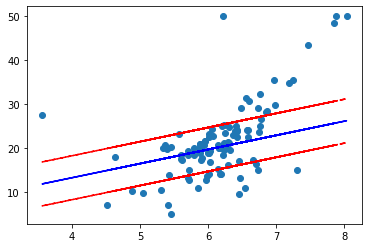

In [24]:
svr_results(x_test, y_test, svr)

## Aumentando o valor de C

In [25]:
#Criação do modelo
eps = 5
C_maior = 1
svr_c_maior = LinearSVR(epsilon = eps, C=C_maior, fit_intercept=True)

In [26]:
#Treinamento do modelo
svr_c_maior.fit(x_train, y_train)

C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVR(C=1, epsilon=5)

In [27]:
#Avaliação do modelo
svr_results (x_test, y_test, svr_c_maior)

MAE = U$ 4863.818462930326
Porcentagem de pontos dentro da margem de erro 63.73


(4.863818462930326, 63.725490196078425)

### Variando o valor de C

In [28]:
valores_de_mae = []
valores_de_perc_within_eps = []

eps = 5
valores_de_c = np.linspace(0.01, 10)

In [29]:
for c in valores_de_c:
    #Criação do modelo
    svr_variando_c = LinearSVR (epsilon = eps, C = c, fit_intercept=True)
    #Treinamento do modelo
    svr_variando_c.fit (x_train, y_train)
    #Avaliação dos resultados
    mae, perc_within_eps = svr_results(x_train, y_train, svr_variando_c, imprimir_resultados=False)
    #Guardar os valores obtidos dentro das listas criadas previamente
    valores_de_mae.append(mae)
    valores_de_perc_within_eps.append(perc_within_eps)

C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yumil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\yumil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\yumil\anaconda3\lib\site-packages\sklearn\utils\v

### Plotando os resultados da nossa busca pelo melhor valor C

NameError: name 'color' is not defined

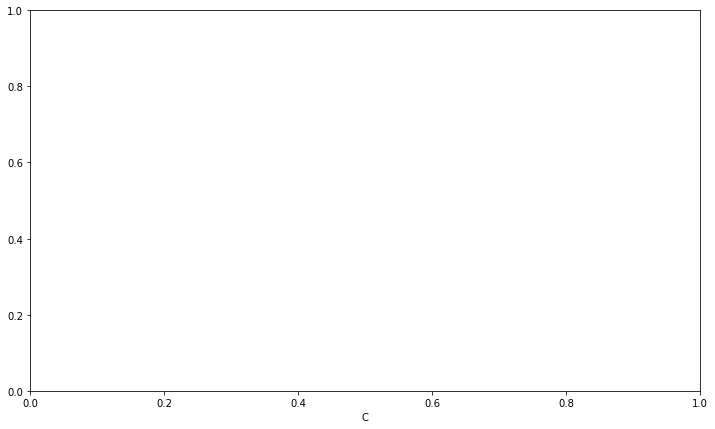

In [30]:
fig, ax1 = plt.subplots(figsize=(12,7))

color1 = 'green'
ax1.set_xlabel('C')
ax1.set_ylabel('% de pontos dentro de margem de erro epsillon', color=color)
ax1.scatter(valores_de_c, valores_de_perc_within_eps, color=color)
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'blue'
ax2 = ax1.twinx() #Compartilha o eixo x entre os dois gráficos
ax2.set_ylabel('MAE', color=color)
ax2.scatter(valores_de_c, valores_de_mae)
ax2.tick_params(axis='y', labelcolor=color2)

plt.show()

In [ ]:
m = max(valores_de_perc_within_eps)
inds = [i for i, j in enumerate(valores_de_perc_within_eps) if j == m]
c_melhor = valores_de_c[inds[0]]

print('Valor de C com maior % de pontos dentro da margem de erro epsillon = ', c_melhor)